## 构造DataFrame

In [149]:
import requests
from tqdm import tqdm                                                     
import numpy as np
import pandas as pd
# 自然语言处理工具包
import nltk 

In [150]:
train = pd.read_csv('./data/Review excerpts for NLP/train.csv')
# 将评论和对应的情绪创建数据集
df = train[['Review','Reception']].copy()
df

,Review,Reception
0,"With Drive-By Truckers, singer-guitarist Jason...",Favorable
1,"Just barely out of his twenties, he writes wit...",Favorable
2,This is best thought of as ‘country soul’. Isb...,Favorable
3,Many of the songs on Isbell's sophomore releas...,Favorable
4,The horns and soul on 'No Choice in the Matter...,Favorable
...,...,...
116379,Pare things back to an insistent Banshees-like...,Mixed
116380,Often Gorillaz records fall victim to feeling ...,Acclaim
116381,"The likes of Robert Smith, Beck, St. Vincent, ...",Favorable
116382,Sprout can get a little too earnest - greater ...,Mixed


In [151]:
df.shape

(116384, 2)

## 文本处理，去除空值和无用字符

In [152]:
# 检查空值
df.isnull().sum()
type(df)

pandas.core.frame.DataFrame

In [153]:
# 只有两行数据，去除他们对整体数据影响不大
df.dropna(axis=0,how='any',inplace=True)

In [154]:
df.shape

(116382, 2)

In [155]:
df.isnull().sum()

Review       0
Reception    0
dtype: int64

In [156]:
import re
import string

def remove_hyperlinks(text):
    sentence = re.sub(r'www?:\/\/.*[\r\n]*', '', text)  
    sentence = re.sub(r'http?:\/\/.*[\r\n]*', '', sentence)
    return re.sub(r'https?:\/\/.*[\r\n]*', '', sentence)

def remove_currencies(text):
    return re.sub(r'[\$\d+\d+\$]', '', text)

def remove_number(text):
    return re.sub(r'\d+', '', text)

def remove_punctuation(text):
    return ''.join([word for word in text if word not in string.punctuation])

df['Review'] = df['Review'].apply(lambda x: remove_hyperlinks(x.lower()))
df['Review'] = df['Review'].apply(lambda x: remove_currencies(x))
df['Review'] = df['Review'].apply(lambda x: remove_number(x))
df['Review'] = df['Review'].apply(lambda x: remove_punctuation(x))
df.head()

,Review,Reception
0,with driveby truckers singerguitarist jason is...,Favorable
1,just barely out of his twenties he writes with...,Favorable
2,this is best thought of as ‘country soul’ isbe...,Favorable
3,many of the songs on isbells sophomore release...,Favorable
4,the horns and soul on no choice in the matter ...,Favorable


In [157]:
# 根据空格获取单词
def tokenize(text):
    return re.split(r'\W+', text) # 大写W 除数字字母下划线之外的字符, 在这里主要是空格

df['Review'] = df['Review'].apply(lambda x: tokenize(x))
df.head()

,Review,Reception
0,"[with, driveby, truckers, singerguitarist, jas...",Favorable
1,"[just, barely, out, of, his, twenties, he, wri...",Favorable
2,"[this, is, best, thought, of, as, country, sou...",Favorable
3,"[many, of, the, songs, on, isbells, sophomore,...",Favorable
4,"[the, horns, and, soul, on, no, choice, in, th...",Favorable


In [158]:
df['Review'].iloc[0]

['with',
 'driveby',
 'truckers',
 'singerguitarist',
 'jason',
 'isbell',
 'learned',
 'to',
 'embrace',
 'some',
 'of',
 'those',
 'southern',
 'rock',
 'cliches',
 'on',
 'his',
 'gritty',
 'vibrant',
 'second',
 'solo',
 'album',
 'he',
 'begins',
 'to',
 'transcend',
 'them']

## 去除停用词

In [159]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopword = stopwords.words('english')
def remove_stopword(text):
    return [word for word in text if word not in stopword]

df['Review'] = df['Review'].apply(lambda x: remove_stopword(x))
df.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\机械革命\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Reception
0,"[driveby, truckers, singerguitarist, jason, is...",Favorable
1,"[barely, twenties, writes, wellworn, weariness...",Favorable
2,"[best, thought, country, soul, isbell, words, ...",Favorable
3,"[many, songs, isbells, sophomore, release, don...",Favorable
4,"[horns, soul, choice, matter, mark, interestin...",Favorable
5,"[unitnamed, mental, facility, isbell, current,...",Favorable
6,"[isbell, recitationdefiantly, unexciting, aver...",Mixed
7,"[latest, band, unit, former, driveby, truckers...",Mixed
8,"[merriweather, post, pavilion, heartbreaking, ...",Acclaim
9,"[even, exuberant, standards, though, acs, nint...",Acclaim


In [160]:
df['Review'].iloc[0]

['driveby',
 'truckers',
 'singerguitarist',
 'jason',
 'isbell',
 'learned',
 'embrace',
 'southern',
 'rock',
 'cliches',
 'gritty',
 'vibrant',
 'second',
 'solo',
 'album',
 'begins',
 'transcend']

可以看到已经去除了一些无意义的单词，比如with

In [161]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
# 把一些名词的词性还原 如 cars-->car
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text])

df['Review'] = df['Review'].apply(lambda x: lemmatize(x))
df.head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\机械革命\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\机械革命\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Review,Reception
0,driveby trucker singerguitarist jason isbell l...,Favorable
1,barely twenty writes wellworn weariness someon...,Favorable
2,best thought country soul isbell word style co...,Favorable
3,many song isbells sophomore release dont neces...,Favorable
4,horn soul choice matter mark interesting new d...,Favorable
5,unitnamed mental facility isbell current homet...,Favorable
6,isbell recitationdefiantly unexciting averagen...,Mixed
7,latest band unit former driveby trucker guitar...,Mixed
8,merriweather post pavilion heartbreaking heart...,Acclaim
9,even exuberant standard though ac ninth album ...,Acclaim


In [162]:
# 获取情绪类别
category = df["Reception"].unique().tolist()
category

['Favorable', 'Mixed', 'Acclaim', 'Unfavorable', 'Dislike']

## 建立单词字典

In [163]:
sentence = df['Review'].values
label = df["Reception"].apply(lambda x: category.index(x)).values

# 获取所有不重复的单词
words = [word.lower() for s in sentence for word in s.split(" ")]
various_words = list(set(words))

int2word = dict(enumerate(various_words))  # 索引到单词
word2int = {w:int(i) for i,w in int2word.items()} # 单词到索引

from collections import Counter
# 统计不同情绪句子的数目
Counter(label)

Counter({0: 69022, 1: 29604, 2: 15871, 3: 1719, 4: 166})

In [164]:
int2word

{0: '',
 1: 'digipop',
 2: 'titlesare',
 3: 'goaround',
 4: 'scififilter',
 5: 'mega',
 6: 'freakys',
 7: 'limpleaved',
 8: 'passé',
 9: 'bluechip',
 10: 'headtrip',
 11: 'unmap',
 12: 'kickiest',
 13: 'singleminded',
 14: 'motherload',
 15: 'discotronics',
 16: 'alternativelite',
 17: 'wrld',
 18: 'willies',
 19: 'immaculateness',
 20: 'spunsilk',
 21: 'coreofyoursoul',
 22: 'plea',
 23: 'beforeoct',
 24: 'mere',
 25: 'fide',
 26: 'alternarock',
 27: 'relay',
 28: 'gymnasium',
 29: 'clapton',
 30: 'fefifofum',
 31: 'weatherhouse',
 32: 'required',
 33: 'significantly',
 34: 'shoutbut',
 35: 'brassnecks',
 36: 'woman',
 37: 'minutesong',
 38: 'clean',
 39: 'infirmary',
 40: 'digesting',
 41: 'ducttaped',
 42: 'truethe',
 43: 'kallman',
 44: 'vest',
 45: 'mardy',
 46: 'circumspection',
 47: 'minimoments',
 48: 'marchands',
 49: 'overcompressed',
 50: 'vocoder',
 51: 'uncle',
 52: 'descant',
 53: 'experimentalists',
 54: 'bahdeni',
 55: 'insincere',
 56: 'kneedeep',
 57: 'charleston',
 5

In [165]:
word2int

{'': 0,
 'digipop': 1,
 'titlesare': 2,
 'goaround': 3,
 'scififilter': 4,
 'mega': 5,
 'freakys': 6,
 'limpleaved': 7,
 'passé': 8,
 'bluechip': 9,
 'headtrip': 10,
 'unmap': 11,
 'kickiest': 12,
 'singleminded': 13,
 'motherload': 14,
 'discotronics': 15,
 'alternativelite': 16,
 'wrld': 17,
 'willies': 18,
 'immaculateness': 19,
 'spunsilk': 20,
 'coreofyoursoul': 21,
 'plea': 22,
 'beforeoct': 23,
 'mere': 24,
 'fide': 25,
 'alternarock': 26,
 'relay': 27,
 'gymnasium': 28,
 'clapton': 29,
 'fefifofum': 30,
 'weatherhouse': 31,
 'required': 32,
 'significantly': 33,
 'shoutbut': 34,
 'brassnecks': 35,
 'woman': 36,
 'minutesong': 37,
 'clean': 38,
 'infirmary': 39,
 'digesting': 40,
 'ducttaped': 41,
 'truethe': 42,
 'kallman': 43,
 'vest': 44,
 'mardy': 45,
 'circumspection': 46,
 'minimoments': 47,
 'marchands': 48,
 'overcompressed': 49,
 'vocoder': 50,
 'uncle': 51,
 'descant': 52,
 'experimentalists': 53,
 'bahdeni': 54,
 'insincere': 55,
 'kneedeep': 56,
 'charleston': 57,
 '

## 清理文本过长或过短的句子

In [166]:
sentence_length = [len(s.split()) for s in sentence]   # 每个句子单词的个数
counts = dict(Counter(sentence_length))

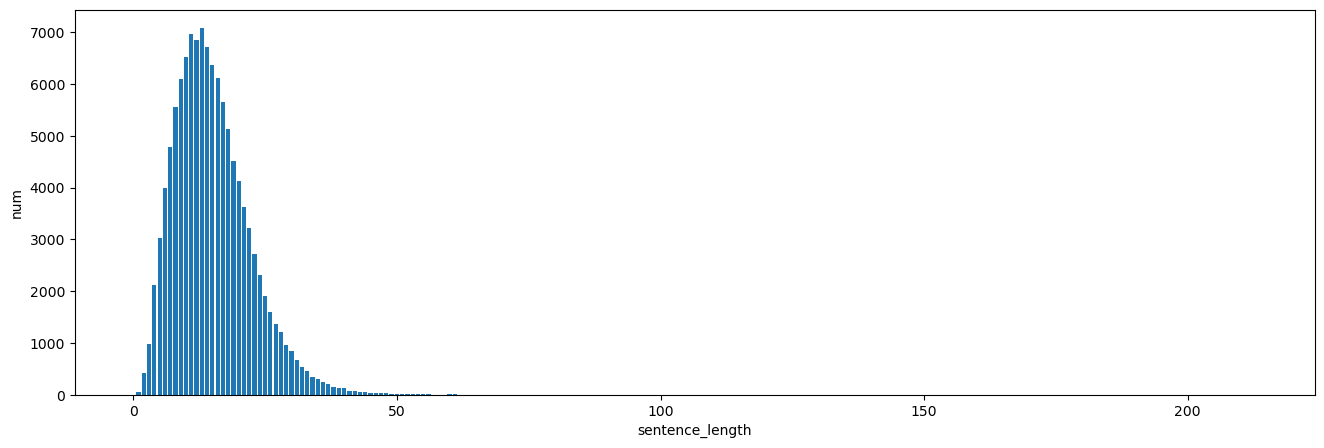

In [167]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plt.bar(counts.keys(),counts.values())
plt.xlabel("sentence_length")
plt.ylabel("num")
plt.show()

In [177]:
min_sen = min(counts.items())
max_sen = max(counts.items())
print("min:{}, max:{}".format(min_sen,max_sen))

min:(0, 1), max:(213, 1)


In [180]:
"""
    获取最小和最大长度的句子的索引
"""
min_index = [i for i,length in enumerate(sentence_length) if length==min_sen[0]]
max_index = [i for i,length in enumerate(sentence_length) if length>=50]
len(max_index)
arr_index = min_index + max_index

In [181]:
# new_text = np.delete(sentence, min_index)
new_text2 = np.delete(sentence, arr_index)
print("原始文本数量：",len(sentence))
print("新文本数量: ", len(new_text2))


原始文本数量： 116382
新文本数量:  116328


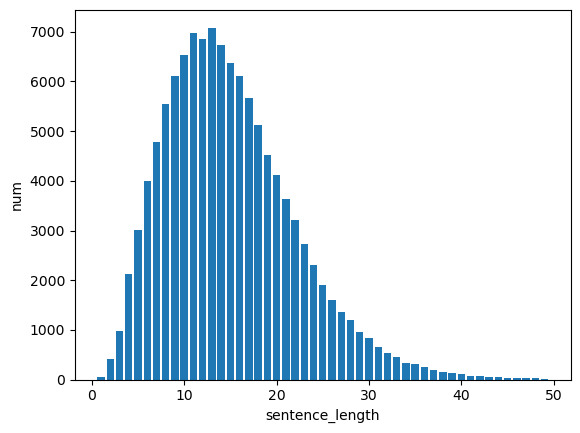

In [186]:
sentence_length = [len(s.split()) for s in new_text2]   # 每个句子单词的个数
counts = dict(Counter(sentence_length))
plt.bar(counts.keys(),counts.values())
plt.xlabel("sentence_length")
plt.ylabel("num")
plt.show()

In [188]:
# new_labels = np.delete(label, min_index)
new_labels = np.delete(label, arr_index)
print("原始标签数量：",len(label))
print("新标签数量: ", len(new_labels))


原始标签数量： 116382
新标签数量:  116328


## 将句子根据单词字典映射成数字

In [192]:
text2ints = []
for sentence in new_text2:
    sample = list()
    for word in sentence.split():
        int_value = word2int[word]
        sample.append(int_value)
    text2ints.append(sample)
text2ints[:3]

[[61446,
  32430,
  35778,
  3709,
  41857,
  18270,
  46025,
  75993,
  54795,
  56463,
  71435,
  58755,
  29767,
  74919,
  11168,
  61087,
  67047],
 [53152,
  59953,
  10125,
  48059,
  643,
  49734,
  6146,
  61515,
  25339,
  76808,
  69728,
  14853,
  38327,
  51973,
  27975,
  24522,
  19957,
  50278,
  33181],
 [35629,
  19070,
  54287,
  65302,
  41857,
  77344,
  10613,
  71147,
  39099,
  37689,
  33192,
  38674,
  76748,
  29986,
  41588,
  68393]]

## 数据的填充和截断

In [196]:
def reset_text(text, seq_len):
#   转换成矩阵
    dataset = np.zeros((len(text),seq_len))
    for index,sentence in enumerate(text):
        if len(sentence) < seq_len:
            dataset[index, :len(sentence)] = sentence  # 后面填充0
        else:
            dataset[index, :] = sentence[:seq_len]  # 截断
    return dataset
            
dataset = reset_text(text2ints, seq_len=40)
dataset

array([[61446., 32430., 35778., ...,     0.,     0.,     0.],
       [53152., 59953., 10125., ...,     0.,     0.,     0.],
       [35629., 19070., 54287., ...,     0.,     0.,     0.],
       ...,
       [44388., 11286., 56127., ...,     0.,     0.,     0.],
       [39032., 75973., 39289., ...,     0.,     0.,     0.],
       [76596., 64245., 23099., ...,     0.,     0.,     0.]])

## 转换为张量

In [197]:
import torch
import torch.nn as nn

dataset_tensor = torch.from_numpy(dataset)
label_tensor = torch.from_numpy(new_labels)
print(type(dataset_tensor), type(label_tensor))

<class 'torch.Tensor'> <class 'torch.Tensor'>


## 划分数据集

In [198]:
all_samples = len(dataset_tensor)
train_ratio = 0.8
val_ratio = 0.2

train = dataset_tensor[:int(train_ratio*all_samples)]
train_labels = label_tensor[:int(train_ratio*all_samples)]

val = dataset_tensor[int(train_ratio*all_samples):]
val_labels = label_tensor[int(train_ratio*all_samples):]

print("训练集:{}----{}".format(train.shape, train_labels.shape))

print("验证集:{}----{}".format(val.shape,val_labels.shape))
print(len(dataset_tensor),len(label_tensor))

训练集:torch.Size([93062, 40])----torch.Size([93062])
验证集:torch.Size([23266, 40])----torch.Size([23266])
116328 116328


## 封装dataloader

In [200]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(train, train_labels)
val_dataset = TensorDataset(val, val_labels)

batch_size = 128

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=8, pin_memory=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=8, pin_memory=True, drop_last=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


## 定义网络模型

In [206]:
class SentimentNet(nn.Module):
    def __init__(self, input_size, embedding_dim, hidden_dim, output_size, num_layers, dropout=0.5):
        super(SentimentNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.output_size = output_size
        self.num_layers = num_layers
        
        self.embedding= nn.Embedding(input_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, dropout=dropout,batch_first=True)
        self.linear = nn.Linear(hidden_dim, 128)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(128, output_size)
        
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x, hidden):
        """
             x:  (128,10)
        """
        
        batch_size = x.size(0)
        x = x.long() 
        embeds = self.embedding(x) # embeds(128,10,200)
        
        
        #  out(128,22,128)--batch_size,seq_len, hidden_size
        #  hidden是个元组{h_n,c_n}每个都是(2, 128,128) -- num_layer,batch_size, hidden_size
        out,hidden = self.lstm(embeds, hidden) 
        out = self.linear(out[:, -1, :]) # out(128，128)
        out = self.dropout(out)
        out = self.relu(out) 
        out = self.linear2(out) # out(128, 6)
        
        return out, hidden # hidden (h_n, c_n)
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters())
        # h_0, c_0
        return (weight.new_zeros(self.num_layers, batch_size, self.hidden_dim),
                weight.new_zeros(self.num_layers, batch_size, self.hidden_dim))



In [207]:
input_size = len(word2int)
output_size = len(category)
embedding_dim = 200
hidden_dim= 128
num_layers= 2


In [208]:
model = SentimentNet(input_size, embedding_dim, hidden_dim, output_size, num_layers)
model.to(device)


SentimentNet(
  (embedding): Embedding(78153, 200)
  (lstm): LSTM(200, 128, num_layers=2, batch_first=True, dropout=0.5)
  (linear): Linear(in_features=128, out_features=128, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=128, out_features=5, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [211]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-3)
# Decay LR by a factor of 0.1 every 3 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


## 模型训练

In [212]:
def train(model, data_loader, criterion, optimizer, scheduler, num_epochs):
    train_process = dict()
    train_loss_epoch10, val_loss_epoch10= [],[]
    val_acc_epoch10 = []
    for epoch in range(num_epochs):
        hs = model.init_hidden(batch_size)
        train_loss = []
        train_correct = 0
        model.train()
        for data, target in data_loader:  
            data = data.to(device)
            target = target.to(device)
            output,hs = model(data, hs)
            preds = torch.argmax(output, dim=1)
            train_correct += torch.sum(preds==target)
            
            hs = tuple([h.data for h in hs])
            loss = criterion(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
        print(f"Epoch [{epoch}/{num_epochs-1}]---train loss {np.mean(train_loss):>.5f}")
        
        scheduler.step()
        
        if epoch % 10 == 0:
            validation_loss, validation_acc = validation(model, val_loader, criterion)
            
            train_loss_epoch10.append(np.mean(train_loss))
            val_loss_epoch10.append(validation_loss)
            val_acc_epoch10.append(validation_acc)
    
    train_process["train_loss"] = train_loss_epoch10
    train_process["val_loss"] = val_loss_epoch10
    train_process["val_acc"] = val_acc_epoch10
    return train_process
            
def validation(model, val_loader, criterion):
    model.eval()
    hs = model.init_hidden(batch_size)
    val_loss = []
    val_correct = 0
    with torch.no_grad():
        for data, target in val_loader:
            data = data.to(device)
            target = target.to(device)
            outs,hs = model(data,hs)
            hs = tuple([h.data for h in hs])
        
            loss = criterion(outs, target)
            preds = torch.argmax(outs, dim=1)
            val_loss.append(loss.item())
            val_correct += torch.sum(preds==target)
    print(f"--------------------------------validation loss is: {np.mean(val_loss):>.5f}, acc is: {100*val_correct/len(val_loader.dataset):>.2f}%")
    return np.mean(val_loss), val_correct/len(val_loader.dataset)       


In [213]:
train_process = train(model, train_loader, criterion, optimizer,exp_lr_scheduler, num_epochs=100)


Epoch [0/99]---train loss 0.91209
--------------------------------validation loss is: 1.50221, acc is: 37.05%
Epoch [1/99]---train loss 0.90596
Epoch [2/99]---train loss 0.90230
Epoch [3/99]---train loss 0.87711
Epoch [4/99]---train loss 0.80633
Epoch [5/99]---train loss 0.73400
Epoch [6/99]---train loss 0.65223
Epoch [7/99]---train loss 0.56617
Epoch [8/99]---train loss 0.47788
Epoch [9/99]---train loss 0.39676
Epoch [10/99]---train loss 0.28470
--------------------------------validation loss is: 2.33112, acc is: 46.42%
Epoch [11/99]---train loss 0.25563
Epoch [12/99]---train loss 0.23563
Epoch [13/99]---train loss 0.22106
Epoch [14/99]---train loss 0.20547
Epoch [15/99]---train loss 0.19324
Epoch [16/99]---train loss 0.18279
Epoch [17/99]---train loss 0.17205
Epoch [18/99]---train loss 0.16319
Epoch [19/99]---train loss 0.15523
Epoch [20/99]---train loss 0.14226
--------------------------------validation loss is: 3.18829, acc is: 45.27%
Epoch [21/99]---train loss 0.14084
Epoch [22/99

## 训练损失可视化

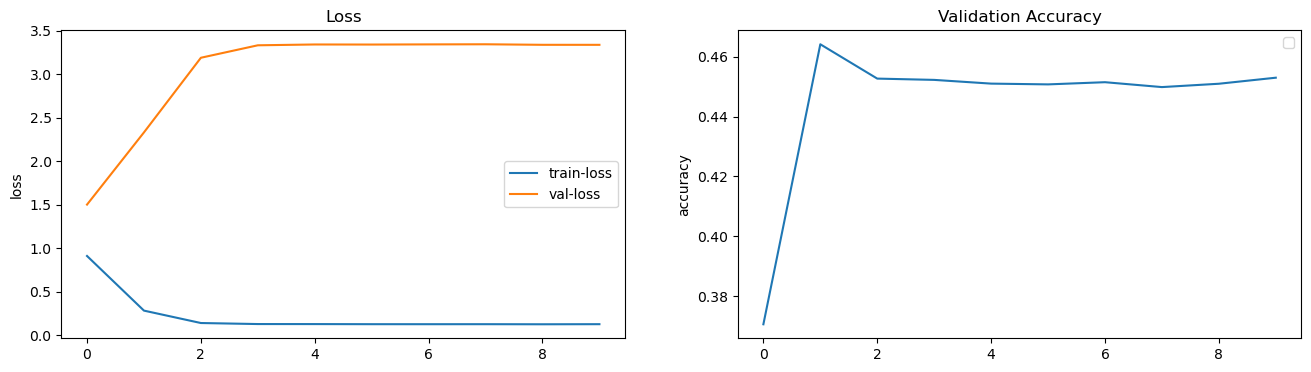

In [215]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title("Loss")
plt.ylabel("loss")
plt.plot(train_process["train_loss"],label="train-loss")
plt.plot(train_process["val_loss"],label="val-loss")
plt.legend()

plt.subplot(1,2,2)
plt.legend(labels=[""])
plt.ylabel("accuracy")
plt.title("Validation Accuracy")
plt.plot(torch.tensor(train_process["val_acc"], device='cpu'))
plt.show()


## 预测

In [218]:
from string import punctuation
texts = ["i wont let me child cry it out because i feel that loving her and lily when she was little was going to be opportunities that only lasted for those short few months",
        "The Bird and the Bee is as light as a feather, for sure. It’s not throwaway, though; the darting melodies and twinkling keyboards are like some divine ringtone and the pair’s love of jazz standards is apparent in the harmonic reach and twists of their songs",
         "i can do it"
       ]
def converts(text):
    text = remove_currencies(text)
    text = remove_number(text)
    new_text = remove_punctuation(text)
    test_text_ints = [word2int[word.lower()]for word in new_text.split() if word in word2int.keys()]
    return test_text_ints

def predict(model):
    test_text_ints = [converts(text) for text in texts]

    new_test_text_ints = reset_text(test_text_ints, seq_len=22)
    text_tensor = torch.from_numpy(new_test_text_ints)
    
    batch_size = text_tensor.size(0)
    hs = model.init_hidden(batch_size)
    
    text_tensor = text_tensor.to(device)
    outs, hs = model(text_tensor,hs)
    preds = torch.argmax(outs, dim=1)
    
    for i in range(len(texts)):
        print(texts[i])
        print("   预测结果是: ", category[int(preds[i])])
    
predict(model)


i wont let me child cry it out because i feel that loving her and lily when she was little was going to be opportunities that only lasted for those short few months
   预测结果是:  Acclaim
The Bird and the Bee is as light as a feather, for sure. It’s not throwaway, though; the darting melodies and twinkling keyboards are like some divine ringtone and the pair’s love of jazz standards is apparent in the harmonic reach and twists of their songs
   预测结果是:  Acclaim
i can do it
   预测结果是:  Mixed
